# Convolutional Neural Network

## Import

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Embedding
from keras.optimizers import Adam

%matplotlib inline

In [64]:
# Read CSV
df = pd.read_csv('alexa_reviews_train.csv', encoding = 'latin')
df.head()

,review,rating
0,"""Great product, fun to use!!""",1
1,Excellent product !!,1
2,I absolutely love my Show!,1
3,Small convenient and dependable. This dot is a...,1
4,Get rid of the &#34;Thongs To Try&#34; screen!...,0


## Data preprocessing

In [65]:
# Labels
y = df['rating']

# Features
X = df['review']

In [66]:
# Clean text
stop_words = set(stopwords.words('english')) 
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = ''.join([word for word in text if word not in string.punctuation])
    text = [lemmatizer.lemmatize(word) for word in text.split(' ')]
    text = [word for word in text if not word in stop_words]
    text = ' '.join(text)
    return text

X = X.apply(lambda x: clean_text(x))

In [67]:
X.sample(20)

560     complaint far know exactly like new little che...
98      love new echo dot right mainly use play music ...
501                      love  using strictly music great
1296                                                 love
1665                                       work perfectly
1536    brought replace one moved doesnt range previou...
1840    im impressed quality sound echo ha definitely ...
1565    great speaker n love much alexa tap definitely...
1329    two dot tap show love echo show sound quality ...
696                                            convenient
685                              great product work great
825     kid love alexa skill amazing would like see ge...
1849    la películas tiene se pueden cambiar español t...
1001    product easy use entertaining  yet hook tv lig...
713                                     perfect condition
659                              exceeded expectation far
1658    echo show  whitenbspgreat new addition alexa h...
124       echo

In [68]:
# Tokenizer object
vocab = 5000
tokenizer = Tokenizer(num_words = vocab)
tokenizer.fit_on_texts(X)
X_temp = tokenizer.texts_to_sequences(X)
X_transformed = pad_sequences(X_temp, maxlen = 50, padding= 'post')

### Split data

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.2, random_state = 46)

## Convolutional Neural Network

#### Initialize the CNN

In [70]:
classifier_CNN = Sequential()

#### Add convolution, pooling and flattening layer

#### Embedding layer

In [71]:
classifier_CNN.add(Embedding(input_dim = vocab, output_dim = 32, input_length = X_train.shape[1]))

#### Convolutional layer

In [72]:
classifier_CNN.add(Conv1D(filters = 32, kernel_size = 3, activation = 'relu'))

#### Pooling layer

In [73]:
classifier_CNN.add(MaxPooling1D(pool_size = 2))

#### Flattening layer

In [74]:
classifier_CNN.add(Flatten())

#### Output layer

In [75]:
classifier_CNN.add(Dense(units = 1, activation = 'sigmoid'))

## Compile the network

In [76]:
# Learning rate and compile
optimizer = Adam(0.001)
classifier_CNN.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [77]:
classifier_CNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 32)            160000    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 48, 32)            3104      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 24, 32)            0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 768)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 769       
Total params: 163,873
Trainable params: 163,873
Non-trainable params: 0
_________________________________________________________________


## Train

In [78]:
history = classifier_CNN.fit(X_train, y_train, batch_size = 32 ,epochs = 10, validation_split = 0.1)

Epoch 1/10
45/45 [==============================] - 0s 5ms/step - loss: 0.5089 - accuracy: 0.8215 - val_loss: 0.3982 - val_accuracy: 0.8438
Epoch 2/10
45/45 [==============================] - 0s 4ms/step - loss: 0.4018 - accuracy: 0.8403 - val_loss: 0.3842 - val_accuracy: 0.8438
Epoch 3/10
45/45 [==============================] - 0s 4ms/step - loss: 0.3733 - accuracy: 0.8431 - val_loss: 0.3605 - val_accuracy: 0.8500
Epoch 4/10
45/45 [==============================] - 0s 4ms/step - loss: 0.3133 - accuracy: 0.8771 - val_loss: 0.3138 - val_accuracy: 0.8813
Epoch 5/10
45/45 [==============================] - 0s 4ms/step - loss: 0.2187 - accuracy: 0.9229 - val_loss: 0.2524 - val_accuracy: 0.8938
Epoch 6/10
45/45 [==============================] - 0s 4ms/step - loss: 0.1361 - accuracy: 0.9493 - val_loss: 0.2239 - val_accuracy: 0.8875
Epoch 7/10
45/45 [==============================] - 0s 4ms/step - loss: 0.0886 - accuracy: 0.9715 - val_loss: 0.2162 - val_accuracy: 0.9062
Epoch 8/10
45/45 [==

## Plot change in accuracy

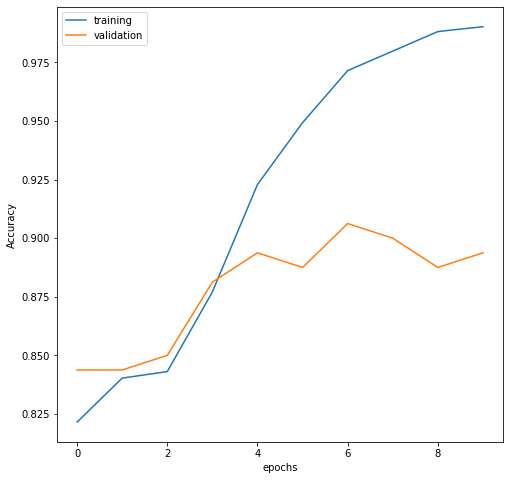

In [79]:
# Create figure and axes
fig, ax = plt.subplots(figsize = (8, 8))

ax.plot(history.history['accuracy'])
ax.plot(history.history['val_accuracy'])
ax.set_xlabel('epochs')
ax.set_ylabel('Accuracy')
ax.legend(['training', 'validation'], loc = 'best')

## Prediction

In [80]:
# Classify any predictions above 0.5 as 1 and below 0.5 as 0
y_pred = classifier_CNN.predict(X_test)
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i] = int(1)
    else:
        y_pred[i] = int(0)

### Confusion matrix

In [81]:
# Matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
pd.DataFrame(data = cm)

Confusion Matrix


,0,1
0,39,24
1,9,328


In [82]:
# Accuracy metric
accuracy = (cm[0, 0] + cm[1, 1])/(cm.sum())
print('Accuracy: ', accuracy)

Accuracy:  0.9175
